In [76]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [77]:
excel_file = pd.ExcelFile("./data/raw_M.xlsx")
excel_pd = excel_file._parse_excel("raw_monthly_data")
answer = pd.read_excel("./data/answer.xlsx", "performance")
meta_setup = {"figsize":(20, 10), "grid": True}
data = excel_pd

#x_base_cncy = ["AUD", "XEU", "GBP"]
#portfolio = ["JPY", "AUD", "KRW", "XEU", "SGD", "GBP"]
#for asset in portfolio:
#    if asset in x_base_cncy:
#        data[asset] = 1/data[asset]

daily_return = data.pct_change().dropna()
answer = answer.dropna()[:-1]


In [78]:
daily_return.cov()

,USD,JPY,AUD,KRW,XEU,SGD,GBP
USD,0.000204,0.000134,0.000337,0.000335,0.000247,0.000178,0.000200
JPY,0.000134,0.000822,0.000175,0.000131,0.000240,0.000177,0.000082
AUD,0.000337,0.000175,0.001302,0.000765,0.000729,0.000443,0.000607
KRW,0.000335,0.000131,0.000765,0.001032,0.000546,0.000364,0.000462
XEU,0.000247,0.000240,0.000729,0.000546,0.000858,0.000329,0.000563
SGD,0.000178,0.000177,0.000443,0.000364,0.000329,0.000252,0.000248
GBP,0.000200,0.000082,0.000607,0.000462,0.000563,0.000248,0.000812


In [156]:
from statsmodels.api import OLS
from statsmodels.api import add_constant
model = OLS(daily_return["USD"], add_constant(daily_return.drop("USD", 1)))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    USD   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     64.23
Date:                Sat, 31 Mar 2018   Prob (F-statistic):           2.88e-42
Time:                        18:15:52   Log-Likelihood:                 639.52
No. Observations:                 188   AIC:                            -1265.
Df Residuals:                     181   BIC:                            -1242.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.617e-05      0.001     -0.109      0.913      -0.001       0.001
JPY            0.0470      0.024      1.956      0.052      -0.000       0.094
AUD            0.0160      0.029      0.547      0.585      -0.042       0.074
KRW            0.1578      0.028      5.603      0.000       0.102       0.213
XEU           -0.0098      0.034     -0.286      0.775      -0.077       0.058
SGD            0.4076      0.076      5.351      0.000       0.257       0.558
GBP            0.0224      0.030      0.754      0.452      -0.036       0.081
==============================================================================
Omnibus:                        7.489   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                8.073
Skew:                          -0.351   Prob(JB):                       0.0177
Kurtosis:                       3.733   Cond. No.                         132.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

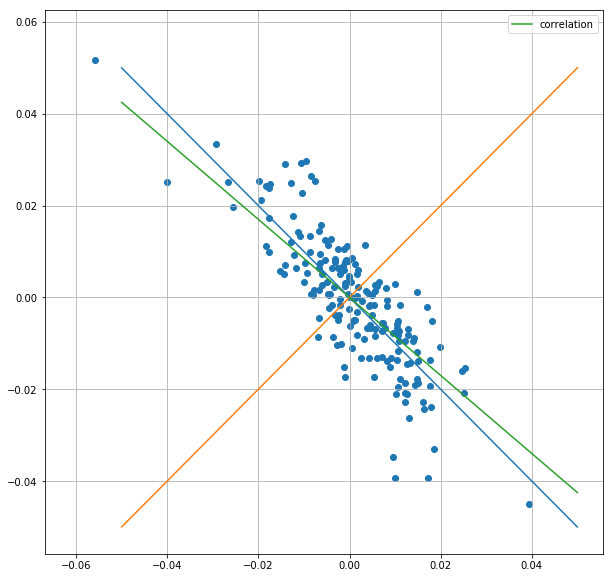

In [150]:
plt.figure(figsize=(10, 10))
y_hat = -res.predict()
y = daily_return["USD"]
plt.scatter(y_hat, y)
l1, = plt.plot([0.05, -0.05], [-0.05, 0.05])
l2, = plt.plot([0.05, -0.05], [0.05, -0.05])
l3, = plt.plot([-0.05, 0.05], [0.05*0.85, -0.05*0.85], label="correlation")
plt.legend(handles=[l3])
plt.grid(True)

In [209]:
m = daily_return.values
def rolling_cov(data, window_size, index):
    width = window_size // 2
    tri_indice = np.tril_indices(data.shape[1])
    all_cov = []
    index_ = []
    for i in range(width, data.shape[0]-width):
        cov_flatten = np.cov(data[i-width:i+width])[tri_indice].tolist()
        all_cov.append(cov_flatten)
        index_.append(index[i])
    return np.array(all_cov), index_

p, indexs = rolling_cov(m, 20, daily_return.index)
cov = pd.DataFrame(p, index=indexs)

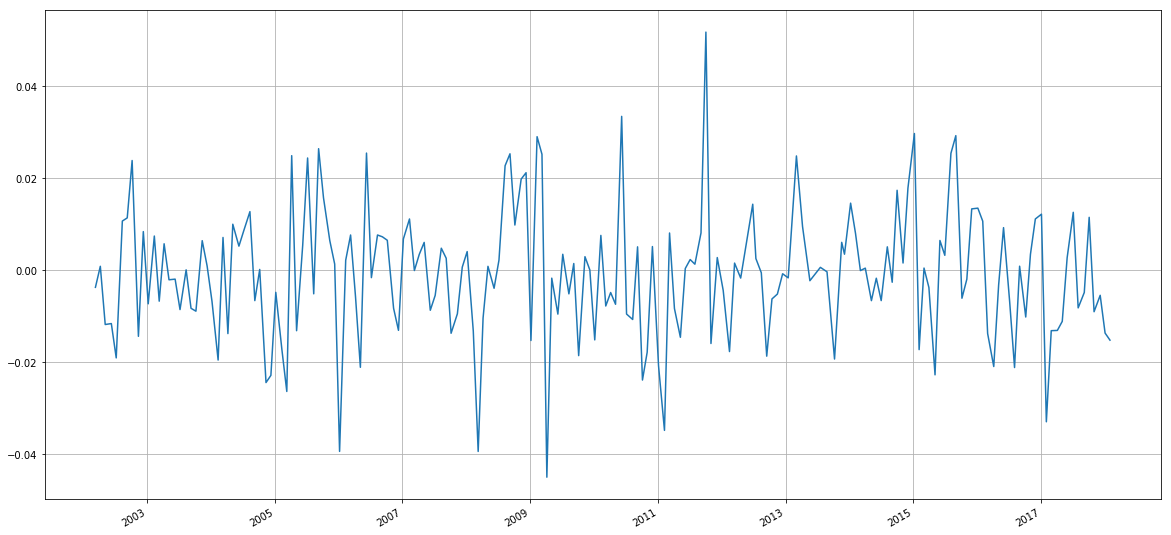

In [214]:
daily_return["USD"].plot(figsize=(20, 10), grid=True)

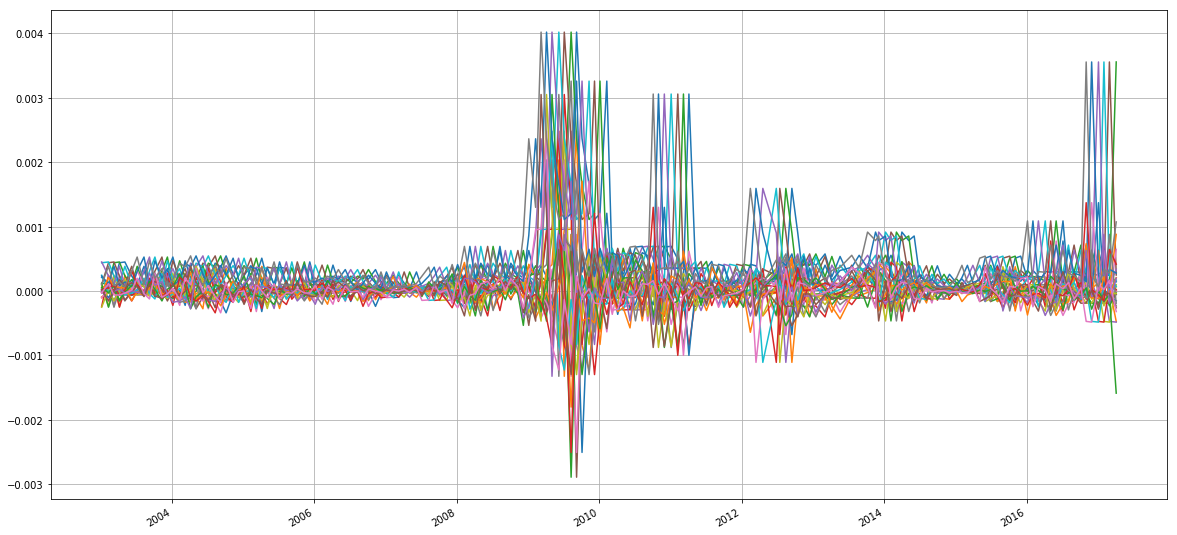

In [211]:
cov.plot(figsize=(20, 10), grid=True, legend=False)

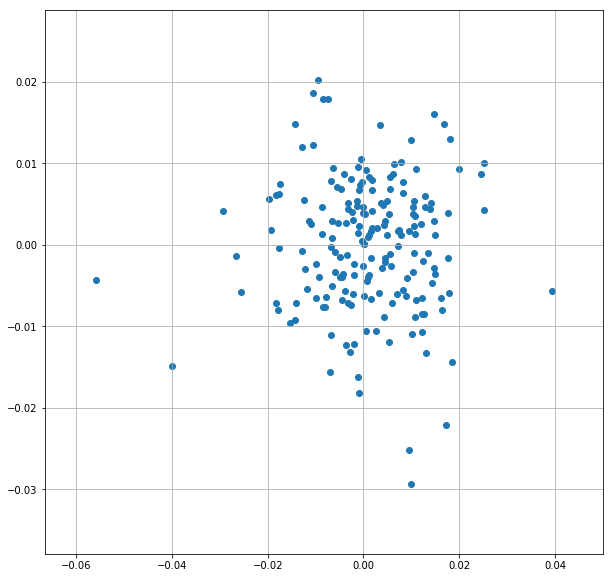

In [157]:
plt.figure(figsize=(10, 10))
plt.scatter(y_hat, res.resid)
plt.grid()

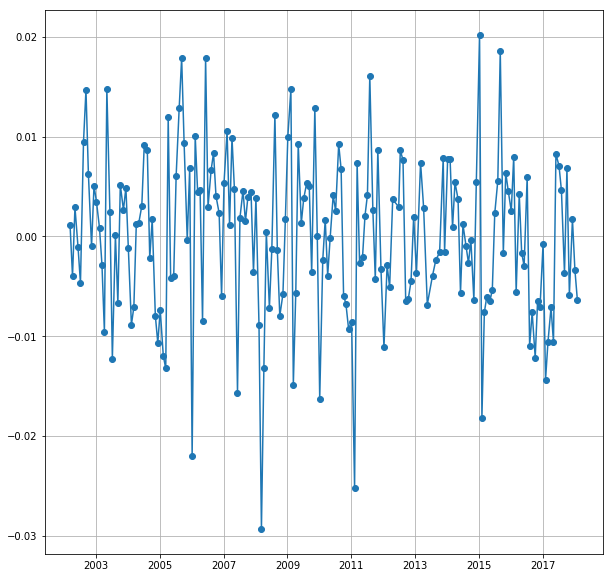

In [163]:
plt.figure(figsize=(10, 10))
plt.plot(daily_return.index, res.resid, "-o")
plt.grid()

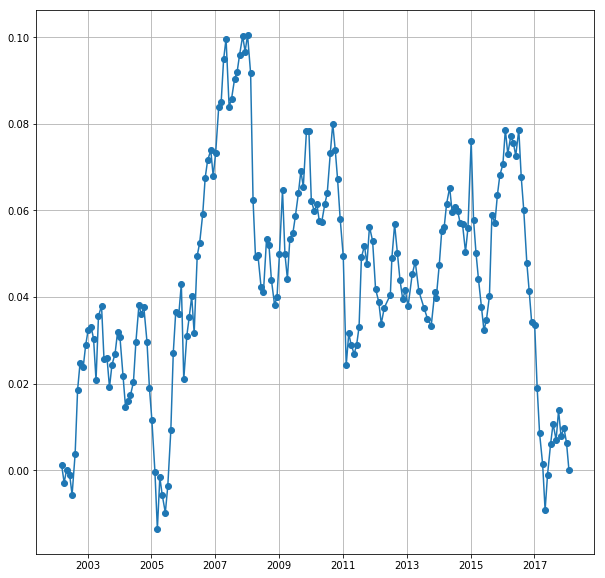

In [165]:
plt.figure(figsize=(10, 10))
plt.plot(daily_return.index, res.resid.cumsum(), "o-")
plt.grid()

In [80]:
data.head()

,USD,JPY,AUD,KRW,XEU,SGD,GBP
2002-02-11,35.080,134.29,1.948178,1320.2,1.140121,1.8333,0.702741
2002-03-11,34.949,129.01,1.920492,1317.0,1.143118,1.8227,0.704027
2002-04-08,34.978,131.36,1.895016,1328.2,1.138822,1.8365,0.697107
2002-05-06,34.565,127.21,1.856321,1281.2,1.093613,1.8043,0.681338
2002-06-10,34.164,124.57,1.751007,1230.5,1.057641,1.7921,0.684088


In [81]:
daily_return.head()

,USD,JPY,AUD,KRW,XEU,SGD,GBP
2002-03-11,-0.003734,-0.039318,-0.014212,-0.002424,0.002629,-0.005782,0.001830
2002-04-08,0.000830,0.018216,-0.013265,0.008504,-0.003758,0.007571,-0.009829
2002-05-06,-0.011807,-0.031593,-0.020420,-0.035386,-0.039698,-0.017533,-0.022620
2002-06-10,-0.011601,-0.020753,-0.056733,-0.039572,-0.032893,-0.006762,0.004036
2002-07-08,-0.019055,-0.046962,0.013128,-0.031776,-0.039516,-0.016350,-0.045636


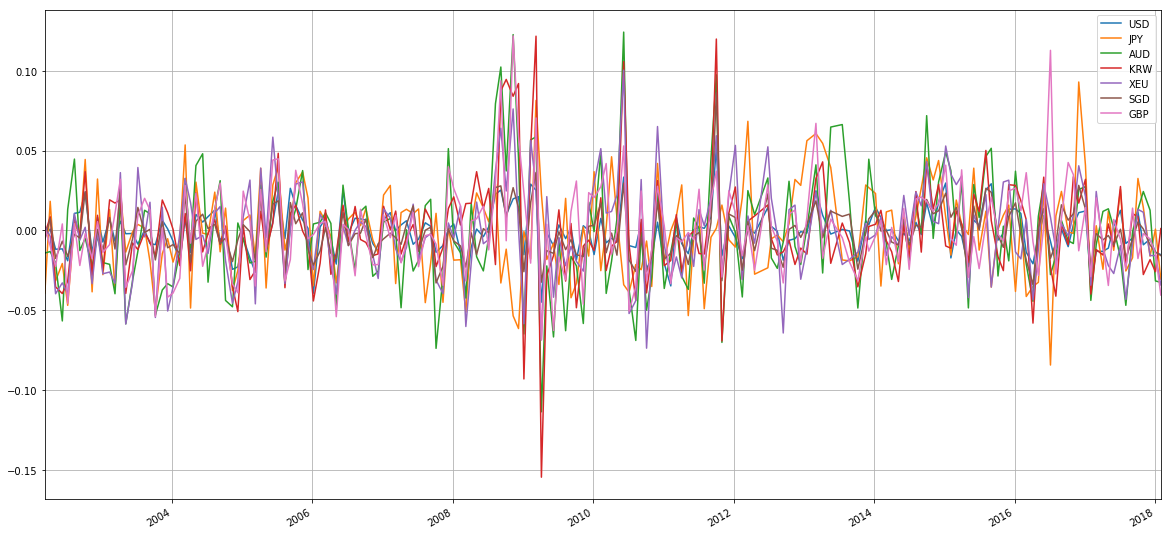

In [62]:
daily_return.plot(**meta_setup)

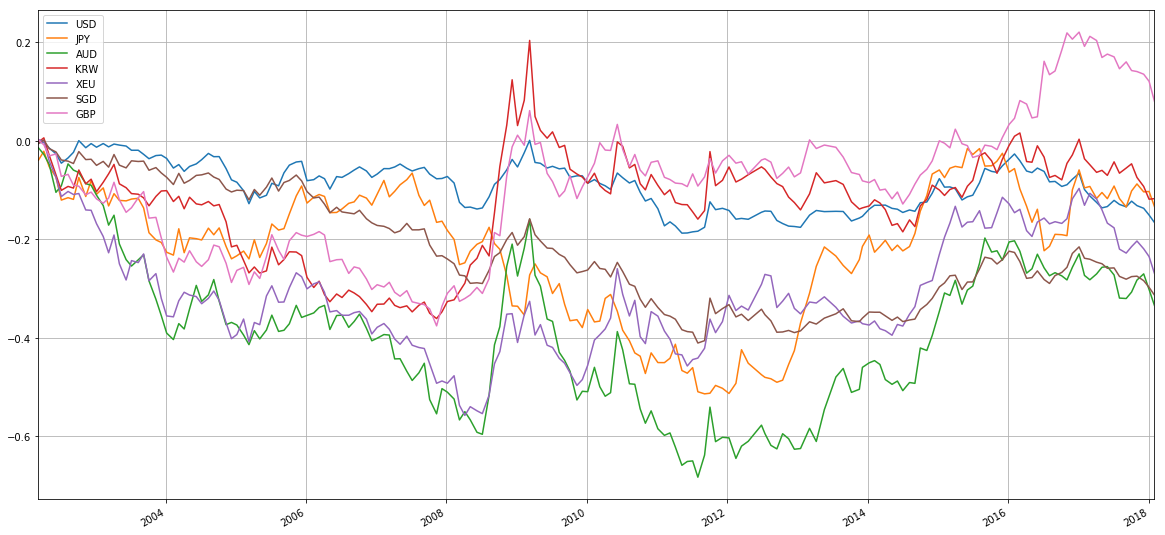

In [63]:
daily_return.cumsum().plot(figsize=(20, 10), grid=True)

In [64]:
def normalize(batch):
    return batch/batch.std(), batch.std()

In [65]:
from model.passive_model import BasketModel
initial_size = 5
agent = BasketModel(target="USD", 
                    portfolio=["JPY", "AUD", "KRW", 
                               "XEU", "SGD", "GBP"])

rewards = []
weighs = []
for step in range(daily_return.shape[0]-initial_size):
    batch = daily_return.iloc[:step+initial_size]
    agent.train(batch[agent._target], batch[agent._portfolio])
    weighs.append(agent._weights)
    new_state = daily_return.iloc[step+initial_size]
    # new_state = new_state.iloc[-1]
    proxy = agent.act(new_state[agent._portfolio])
    target = new_state[agent._target]
    r = (- proxy + target)
    rewards.append(r)

Text(0.5,1,'ACF')

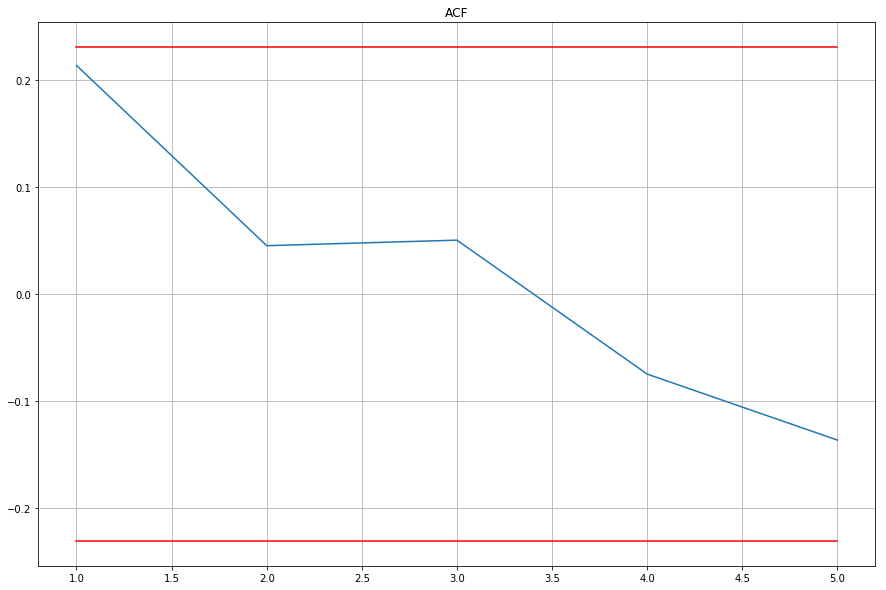

In [66]:
from statsmodels.tsa import ar_model
fig = plt.figure(figsize=(15, 10))
def acf(order, data):
    acf_list = []
    for i in range(order):
        acf_list.append(np.corrcoef(data[:-(i+1)], data[i+1:])[0, 1])
    return acf_list
acf_neg_seq = acf(5, rewards)
plt.plot(range(1, 6), acf_neg_seq)
plt.plot(range(1, 6), np.ones_like(acf_neg_seq)*0.2312, "r-")
plt.plot(range(1, 6), np.ones_like(acf_neg_seq)*-0.2312, "r-")
plt.grid()
plt.title("ACF")

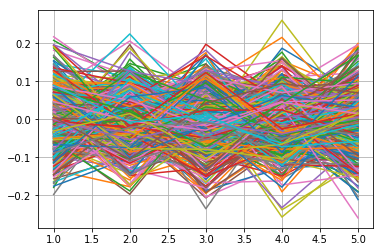

In [67]:
for i in range(500):
    acf_neg_seq = acf(5, np.random.normal(size=len(rewards), loc=np.mean(rewards),
                                           scale=np.std(rewards)))
    plt.plot(range(1, 6), acf_neg_seq)
plt.grid()


Text(0.5,1,'PACF')

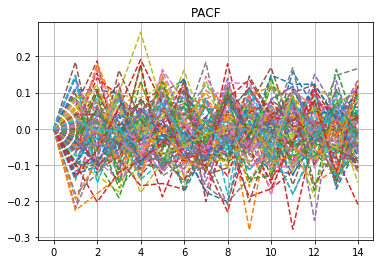

In [68]:
from statsmodels.tsa import ar_model
# it seems the residual have some moving-everage beavior
for i in range(100):
    p = ar_model.AR(endog=np.random.normal(size=len(rewards), loc=np.mean(rewards),
                                           scale=np.std(rewards))).fit()
    plt.plot(range(p.params.shape[0]), p.params, "--") #PACF
plt.grid()
plt.title("PACF")

Text(0.5,1,'PACF')

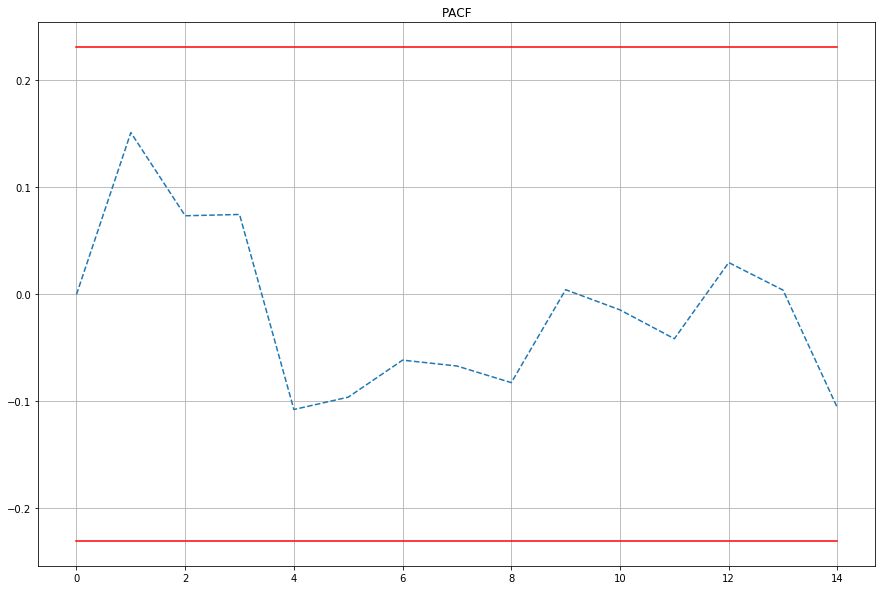

In [69]:
from statsmodels.tsa import ar_model
# it seems the residual have some moving-everage beavior
fig = plt.figure(figsize=(15, 10))
p = ar_model.AR(endog=answer['total']).fit()
plt.plot(range(p.params.shape[0]), p.params, "--") #PACF
plt.plot(range(p.params.shape[0]), np.ones_like(p.params)*0.2312, "r-")
plt.plot(range(p.params.shape[0]), np.ones_like(p.params)*-0.2312, "r-")
plt.grid()
plt.title("PACF")

In [70]:
model = ar_model.AR(endog=rewards)
p = model.fit()

In [71]:
np.mean(rewards)

-0.00019987886653101522

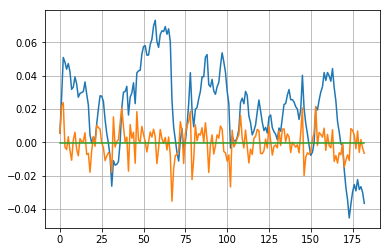

In [72]:
plt.plot(range(len(rewards)), np.cumsum(rewards))
plt.plot(range(len(rewards)), rewards)
plt.plot(range(len(rewards)), np.ones_like(rewards)*np.mean(rewards))
plt.grid()

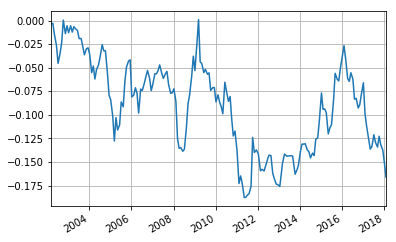

In [73]:
daily_return["USD"].cumsum().plot()
plt.grid()

In [74]:
from model.passive_model import BasketModel
initial_size = 50
agent = BasketModel(target="USD", 
                    portfolio=["JPY", "AUD", "KRW", 
                               "XEU", "SGD", "GBP"])

# dynamic estimate the correlation matrix

rewards = []
weighs = []
for step in range(initial_size, daily_return.shape[0]):
    batch = daily_return.iloc[:step]
    agent.train(batch[agent._target], batch[agent._portfolio])
    weighs.append(agent._weights)
    new_state = daily_return.iloc[step]
    # new_state = new_state.iloc[-1]
    proxy = agent.act(new_state[agent._portfolio])
    target = new_state[agent._target]
    r = (- proxy + target)
    rewards.append(r)

In [75]:
min(rewards)

-0.035305367261375419

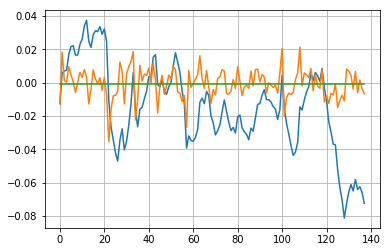

In [76]:
plt.plot(range(len(rewards)), np.cumsum(rewards))
plt.plot(range(len(rewards)), rewards)
plt.plot(range(len(rewards)), np.ones_like(rewards)*np.mean(rewards))
plt.grid()

In [77]:
from model.passive_model import BasketModel
initial_size = 50
agent = BasketModel(target="USD", 
                    portfolio=["JPY", "AUD", "KRW", 
                               "XEU", "SGD", "GBP"])

# dynamic estimate the correlation matrix
time_index = []
rewards_dy = []
weighs_dy = []
for step in range(initial_size, daily_return.shape[0]):
    batch = daily_return.iloc[step-initial_size:step]
    agent.train(batch[agent._target], batch[agent._portfolio])
    weighs_dy.append(agent._weights)
    
    new_state = daily_return.iloc[step]
    # new_state = new_state.iloc[-1]
    proxy = agent.act(new_state[agent._portfolio])
    target = new_state[agent._target]
    time_index.append(daily_return.index[step])
    r = (- proxy + target)
    rewards_dy.append(r)

In [78]:
print(1/(agent.weights.sum() + 1))
print(agent.weights/(agent.weights.sum() + 1))
daily_return.columns[1:]

0.580000333314
[ 0.0098245   0.03291908  0.10530481 -0.066641    0.2899875   0.04860478]


Index(['JPY', 'AUD', 'KRW', 'XEU', 'SGD', 'GBP'], dtype='object')

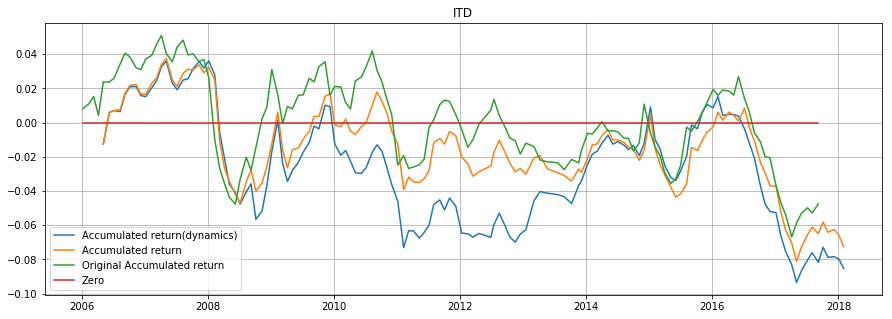

In [81]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
plt.plot(time_index, np.cumsum(rewards_dy), label='Accumulated return(dynamics)')
#plt.plot(time_index, rewards_dy, label='Monthly Return(dynamics)')
#plt.plot(time_index, np.ones_like(rewards_dy)*np.mean(rewards_dy), label='Average return(dynamics)')
# ax.annotate("{}".format(np.mean(rewards_dy)), xy=(-1, np.mean(rewards_dy)))
plt.plot(time_index, np.cumsum(rewards), label='Accumulated return')
plt.plot(answer.index[40:], np.cumsum(answer['total'].iloc[40:]), label='Original Accumulated return')
#plt.plot(time_index, rewards, label='Monthly Return')
#plt.plot(time_index, np.ones_like(rewards)*np.mean(rewards),
#       label='Average return')
plt.plot(answer.index[40:], np.zeros_like(answer.index.tolist()[40:]), label="Zero")
#ax.set_xticklabels([x.strftime('%a\n%d\n%h\n%Y') for x in time_index])
plt.grid()
plt.legend()
plt.title("ITD")
plt.savefig('basket_result')

In [23]:
print(np.std(rewards_dy))
print(np.mean(rewards_dy))
print(np.std(rewards))
print(np.mean(rewards))
print(np.std(answer['total'][40:]))
print(np.mean(answer['total'][40:]))

0.00924684589443
-0.000540062063752
0.00880929993324
-0.000491202295867
0.009464862592528763
-0.000346986659901322


In [24]:
m = pd.DataFrame(rewards, index=time_index)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=True).std()
  """Entry point for launching an IPython kernel.


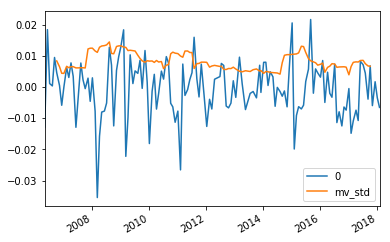

In [25]:
l = pd.rolling_std(m, center=True,window=10)
l.columns = ["mv_std"]
l.index = m.index
pd.concat([m, l], axis=1).plot()

In [26]:
basket = pd.ExcelFile('./basket_daily.xlsx')

In [27]:
data = basket.parse(basket.sheet_names[0])

In [28]:
answer = pd.read_excel("./basket_daily.xlsx", basket.sheet_names[0])

In [29]:
data = answer

In [30]:
data.index = pd.to_datetime(data.iloc[:, 0])

In [31]:
data = data.drop(["Date"], axis=1)

In [32]:
data.to_excel("./basket_reformat.xls")

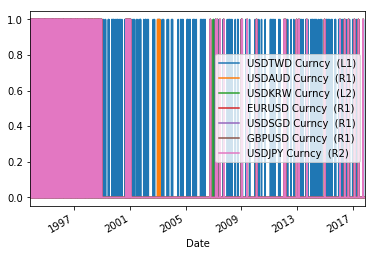

In [33]:
data.isnull().plot()

In [34]:
t = data['EURUSD Curncy  (R1)'].isnull()
n_not_null = 0
time = None
for index, val in enumerate(t):
    if not val:
        n_not_null += 1
        time = index
    if n_not_null == 1:
        break


In [35]:
data = data.iloc[time:]

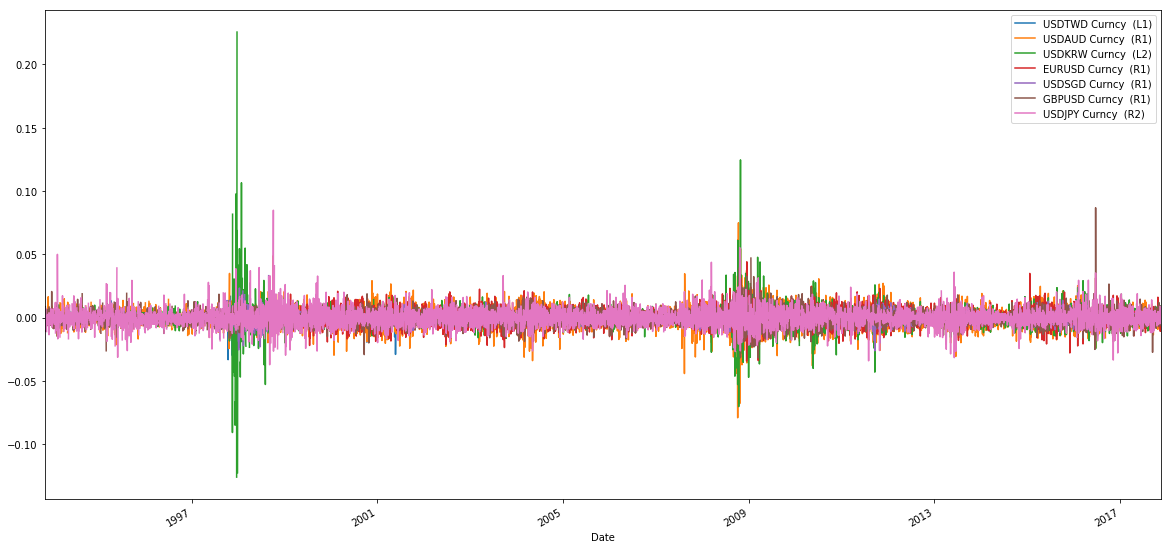

In [36]:
((data - data.shift(1))/data.shift(1)).plot(figsize=(20, 10))

In [37]:
port_return = ((data - data.shift(1))/data.shift(1)).mean(1)

In [38]:
def var_signal():
    port_std = pd.rolling_std(port_return, window=50, center=True)
    signal_sharp = port_std > pd.expanding_median(port_std)
    return signal_sharp

def mean_signal():
    port_mean = - pd.rolling_mean(port_return, window=50, center=True)
    signal_mean = port_mean > pd.expanding_median(port_mea)
    return signal_mean

def sharp_signal():
    port_std = pd.rolling_std(port_return, window=10)
    port_mean = - pd.rolling_mean(port_return, window=10)
    port_sharp = port_mean/port_std
    signal_sharp = port_sharp > pd.expanding_median(port_sharp)
    return signal_sharp

In [39]:
port_std = pd.rolling_std(port_return, window=60, center=True)
port_mean = -pd.rolling_mean(port_return, window=60, center=True)
port_sharp = port_mean/port_std
signal_sharp = port_sharp > pd.expanding_median(port_sharp)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=True).std()
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=True).mean()
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.expanding_median is deprecated for Series and will be removed in a future version, replace with 
	Series.expanding(min_periods=1).median()
  after removing the cwd from sys.path.


In [40]:
# singal = sharp_signal()

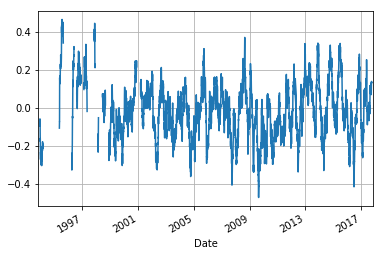

In [41]:
port_sharp.plot()
plt.grid()

In [42]:
port_return.head()

Date
2017-11-17         NaN
2017-11-16    0.000493
2017-11-15    0.000705
2017-11-14    0.000335
2017-11-13   -0.001070
dtype: float64

In [43]:
future_return = port_return.shift(-1)

In [44]:
m = pd.rolling_mean(port_sharp, window=60, center=True)
p = ((data - data.shift(1))/data.shift(1)).mean(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=True).mean()
  """Entry point for launching an IPython kernel.


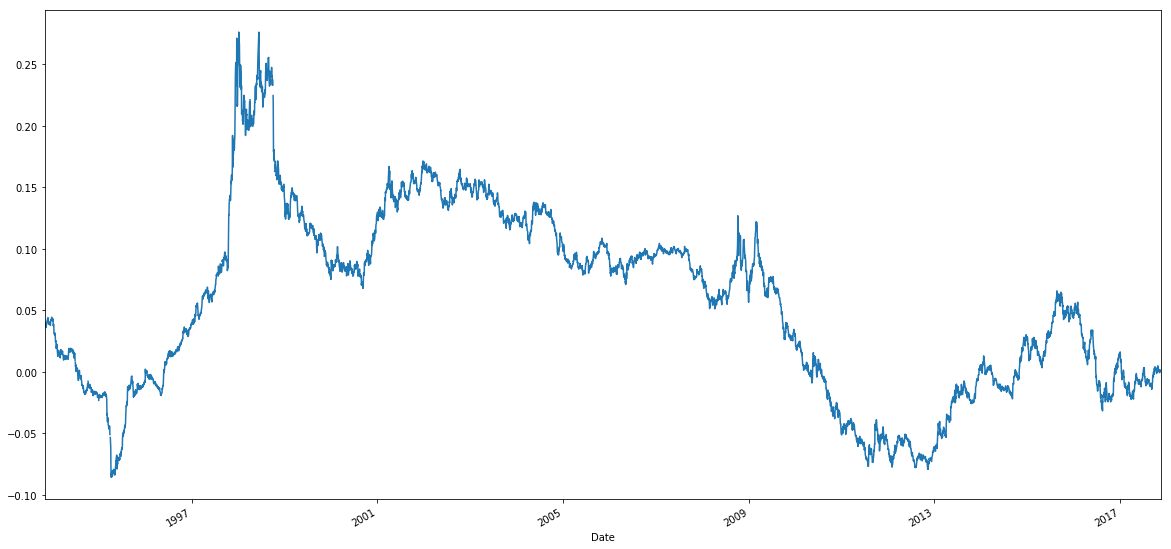

In [45]:
plt.figure(figsize=(20, 10))
((data - data.shift(1))/data.shift(1)).mean(1).cumsum().plot()

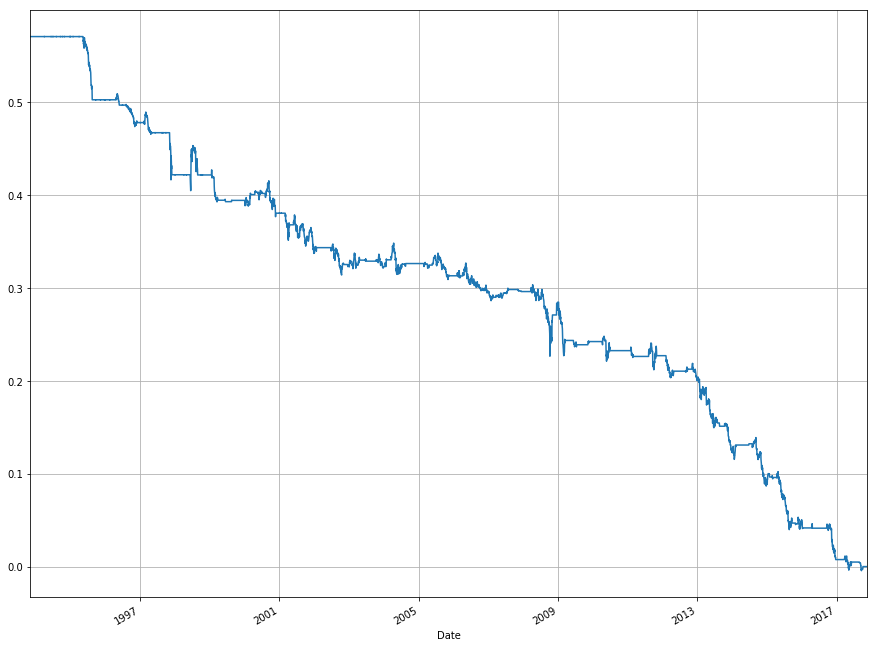

In [46]:
fig = plt.figure(figsize=(15, 12))
(- port_return.multiply(signal_sharp, 0)).cumsum().plot()
plt.grid()

In [ ]:
wor

In [47]:
excel_file = pd.ExcelFile("./currency_vix.xlsx")


In [48]:
excel_file = pd.ExcelFile("./currency_vix.xlsx")
d= excel_file.parse()
d = d.set_index("Date")

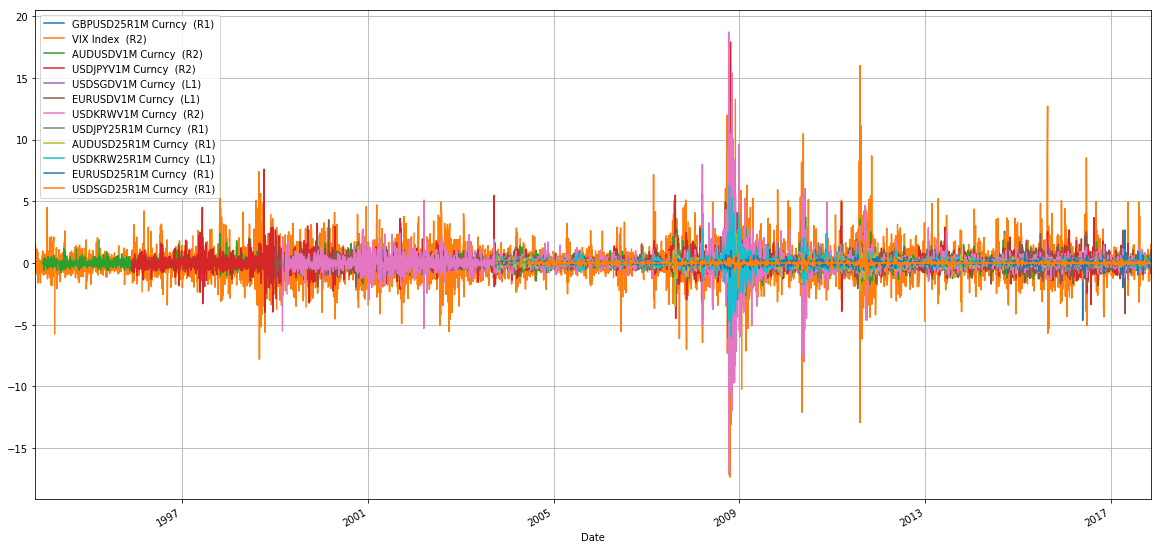

In [49]:
(d - d.shift(1)).plot(figsize=(20, 10))
plt.grid()

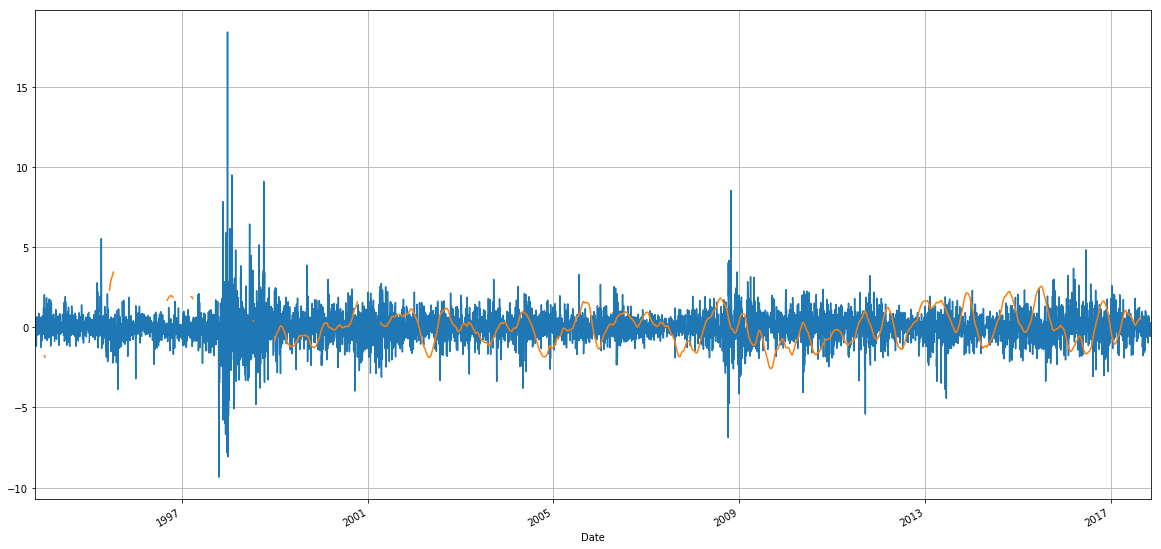

In [50]:
fig = plt.figure(figsize=(20, 10))
((p - p.mean())/p.std()).plot()
((m - m.mean())/m.std()).plot()
plt.grid()

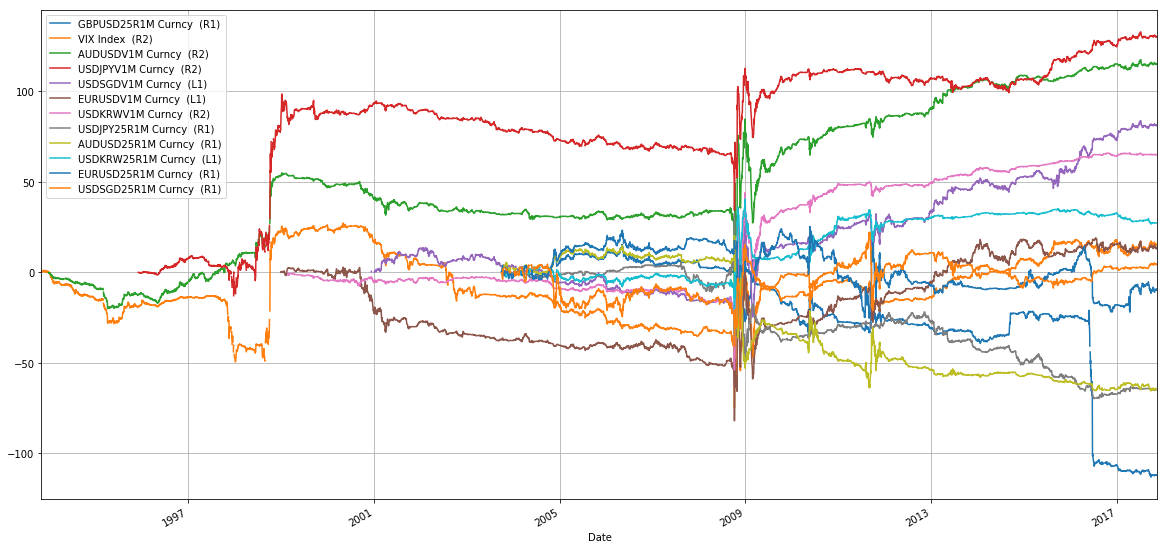

In [51]:
# the G10 currency seems to be affected by the effects
m = ((d - d.mean()) / d.std()).multiply(((p - p.mean())/p.std()), 0)
(m/m.std()).cumsum().plot(figsize=(20, 10))
plt.grid()

In [52]:
m = pd.ExcelFile("./Desktop/cross_vix.xlsx")
m.parse()

FileNotFoundError: [Errno 2] No such file or directory: './Desktop/cross_vix.xlsx'

In [ ]:
m = read_from_bloomberg("./Desktop/cross_vix.xlsx")

In [ ]:
# merge by time 
data.to_excel("./cross_vis.xls")

In [ ]:
data = m['工作表1'].dropna(1, how="all")

In [ ]:
port_return.plot()

In [ ]:
data

In [ ]:
from functools import reduce
columns = list(set(map(lambda x: x.split(".")[0], data.columns.tolist())))

In [ ]:
columns

In [ ]:
col_last = 0
for i, name in enumerate(columns[1:]):
    try:
        info_dis = ["Date", "PX_LAST"]
        col = data[["{}.{}".format(name, info) for info in info_dis]]
        col.columns = ["Date", col.columns[1]]
        col.set_index("Date", inplace=True)
        col.sort_index(inplace=True)
        col.dropna(how="all", inplace=True)
        if i == 0:
            col_last = data[["{}.{}".format(columns[i-1], info) for info in info_dis]]
            col_last.columns = ["Date", col_last.columns[1]]
            col_last.set_index("Date", inplace=True)
            col_last.sort_index(inplace=True)
            col_last.dropna(how="all", inplace=True)

        col_last = pd.concat([col_last, col], axis=1)
    except:
        pass

In [ ]:
((col_last - col_last.mean())/col_last.std()).plot(figsize=(20, 10), grid=True, legend=False)

In [ ]:
col_last.dropna(0, how="all").columns

In [ ]:
def plot_rescale(m, figsize=(20, 10), grid=True, legend=False):
    ((m - m.mean())/m.std()).plot(figsize=figsize, grid=grid, legend=legend)

In [ ]:
m = col_last.fillna(method="ffill")
plot_rescale(m)

In [ ]:
import numpy as np
import scipy as sp

In [ ]:
 daily_return.cov()

In [ ]:
daily_return.cov()["USD"]["JPY"]

In [ ]:
from itertools import permutations

In [ ]:
time_period = p.index.get_level_values(0)
p = pd.rolling_cov(daily_return, window=30, center=True)["JPY"]
p[p.index.get_level_values(1) == "JPY"].plot()
k = p[p.index.get_level_values(1) == "JPY"]

In [ ]:
k.index = k.index.get_level_values(0)

In [ ]:
col_last["{}{}V1M Curncy.PX_LAST".format("USD", "JPY")][time_period]

In [ ]:
col_last["{}{}V1M Curncy.PX_LAST".format("USD", "JPY")][time_period].plot() # (TWD, JPY)

# (col_last.loc[time_period]["JPY"] - col_last["{}{}V1M Curncy.PX_LAST".format("USD", "JPY")][time_period] - m.loc[time_period]).plot()

In [ ]:
targets = ["USD", "JPY", "AUD", "KRW", "XEU", "SGD", "GBP", "TWD"]
for x, y in permutations(targets, 2):
    try:
        print(cross_vix_mean["{}{}V1M Curncy.PX_LAST".format(x, y)])
        print(daily_return.cov()[x][y])
        print("{}{}V1M Curncy.PX_LAST".format(x, y))
    except:
        pass

In [ ]:
o

In [ ]:
o = col_last.mean()/10000.

In [ ]:
cross_vix = pd.read_excel('./cross_vis.xls')

In [ ]:
cross_vix_mean = cross_vix.mean()

In [ ]:
cross_vix_mean

In [ ]:
m = pd.read_excel("./vix_tw.xlsx")
m["Date"] = pd.to_datetime(m["Date"])
m.set_index("Date", 1, inplace=True)

In [ ]:
m.index

In [ ]:
import akila
from akila import envs

In [7]:
import numpy as np
a = np.random.normal(size=1000)
b = np.random.normal(size=1000)
print(np.cov(a.cumsum(), b.cumsum()))
print(np.cov(a, b))

[[ 89.96272437  22.34942055]
 [ 22.34942055 221.52353866]]
[[0.99701929 0.00780609]
 [0.00780609 1.03088069]]


In [8]:
p_a = 10 a.cumsum()
p_b = b.cumsum()

In [13]:
r_a = (p_a[1:] - p_a[:-1])/p_a[:-1]
r_b = (p_b[1:] - p_b[:-1])/p_b[:-1]

In [14]:
print(np.cov(r_a, r_b))

[[0.6817808  0.01968246]
 [0.01968246 8.19956557]]
